# K Nearest Neighbours (k-NN)

In this notebook, we will implement k-NN from scratch. We will be checking out the following:
- **distance calculation** and
- **nearest neighbour** based label or output assignment.

k-NN does not have a model. It stores all examples in the training set.

For a given value of $k$ and selected distance metric, k-NN uses the following steps to assign labels to the new examples:
1. Find the ditance between the new example to all other examples in the training set.
2. Select the $k$ nearest examples to get their labels.

k-NN technique can be uses in both **classification** and **regression** problems.
- For classification task, **assign the label taken by the majority of *k* nearest neighbours**.
- For regression task, **take the average of the output label and assign it to the new example.**

Let's begin by importing the requisite libraries.

In [1]:
#@title [Import Libraries]
# Imported for proper rendering of Latex in notebook
from IPython.display import display, Math, Latex

import numpy as np

# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

In [22]:
# to make the notebook's output stable across runs
np.random.seed(42)

# Distance Computation

We will first implement the distance computation between the $2$ examples.

In [2]:
def EuclideanDistance(x1,x2):
    '''
    Parameters
    ----------
    x1 and x2  : two row vectors, i.e. numpy arrays.
        x1 can have multiple rows, in that case the function returns
        Euclidean distance between every row in x1 and x2.
    
    Returns
    -------
    dist : a vector of Euclidean distances between every row vector in x1
        from x2
    '''
    dist = np.sum((x1-x2)**2, axis=1)
    return dist

def ManhattanDistance(x1,x2):
    '''
    Parameters
    ----------
    x1 and x2  : two row vectors, i.e. numpy arrays.
        x1 can have multiple rows, in that case the function returns
        Manhattan distance between every row in x1 and x2.
    
    Returns
    -------
    dist : a vector of Manhattan distances between every row vector in x1
        from x2
    '''
    dist = np.sum(np.abs(x1-x2), axis=1)
    return dist

In the next $2$ sections, we will implement classification and regression with k-NN.

# KNN Implementation

Let's implement the KNN class.

In [3]:
# for compluting classification tasks
class KNN:
    def __init__(self, k, distance_metric=EuclideanDistance, task_type="Classification"):
        '''
        Parameters
        ----------
        newExample : example for which the prediction has to be made
        k : number of nearest neighbours used to make the prediction
        distance_metric : function used to calculate the distance between the data points
        task_type : classification or regression
        '''
        # 1. Set 'k' to the desired desired value,
        # i.e. how many neighbours should be allowed to participate in the prediction
        self._k = k
        self._distance_metric = distance_metric
        self._task_type = task_type
    
    def fit(self, X, y):
        '''
        Paramteres
        ----------
        X : A matrix of input examples
        y : A column vector of corresponding labels
        '''
        # fitting a model on data only requires copying the data
        self._X = X
        self._y = y
    
    def predict(self, newExample):
        '''
        Parameters
        ----------
        newExample : example for which the prediction has to be made
        k : number of nearest neighbours used to make the prediction
        distance_metric : function used to calculate the distance between the data points
        task_type : classification or regression

        Returns
        -------
        label : predicted label for newExample
        k_nearest_neighbours_indices : indices of the nearest k neighbours
        '''
        # 2. Calculate the distance between the new example and every example from the data.
        # Thus create a distance vector.
        distance_vector = self._distance_metric(self._X, newExample)

        # 3. Get the indices of the nearest k neighbours
        k_nearest_neighbours_indices = np.argpartition(distance_vector, self._k)[:self._k]

        # 4. Get theh labels of the k selected entries
        k_nearest_neighbours = self._y[k_nearest_neighbours_indices]

        # 5. If it is a classification task, return the majority class by computng
        # mode of the k nearest labels
        if self._task_type == "Classification":
            label = stats.mode(k_nearest_neighbours)[0]
        
        # 6. If it is a regression task, return the average of labels of
        # the k nearest neighbours
        if self._task_type == "Regression":
            label = k_nearest_neighbours.mean()
        
        return label, k_nearest_neighbours_indices
    
    def eval(self, X_test, y_test):
        '''
        Parameters
        ----------
        X_test, y_test : test dataset

        Returns
        -------
        Misclassification error
        OR
        Root mean square error
        '''
        # compute labels for test data and compute its corresponding error
        # based on task_type
        if self._task_type == "Classification":
            y_predicted = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_predicted[i],_ = self.predict(X_test[i,:])
            error = np.mean(y_test==y_predicted, axis=0)

        if self._task_type == "Regression":
            y_predicted = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_predicted[i],_ = self.predict(X_test[i,:])
            error_vector = y_predicted - y_test
            error = np.sqrt((error_vector.T @ error_vector)/error_vector.ravel().shape[0])
        
        return error

## Classification

### Example 1 : Simple decision boundary

Let's generate 100 points, each represented with $2$ features and a class label. This dataset is generated for **classification task**.
> The points are generated such that they are clustered in $2$ groups with means $[0,0]$ and $[5,5]$ with a standard deviation of $1$.

In [4]:
# generate artificial points
X,y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=[[0,0],[5,5]],
    cluster_std=1,
    random_state=69
)

Let's check the shapes of feature matrix and label vectors.

In [5]:
print(X.shape, y.shape)

(100, 2) (100,)


Let's visualize these datapoints.

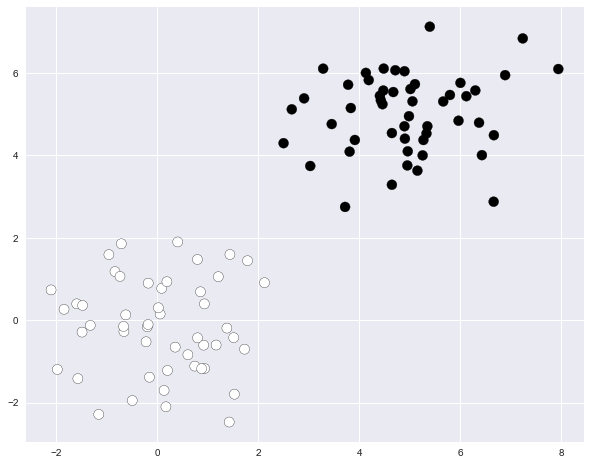

In [6]:
# plot the 2 classes

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k')
plt.show()

Let's apply the KNN technique and visualize how a new example is assigned a label. For this example the value of ***k*** is set to be $3$.

In [7]:
newExample = np.array([2.2, 2.2])

# initialize a model with k=3 and suclidean distance as distance metric.
model = KNN(
    k=3,
    distance_metric=EuclideanDistance,
    task_type="Classification",
)

model.fit(X,y)

# get the predicted label and the indices of the nearest k neighbours
prediction, nearest_neighbours_indices = model.predict(newExample.reshape(1,2))

Let's visualize the examples with training examples.

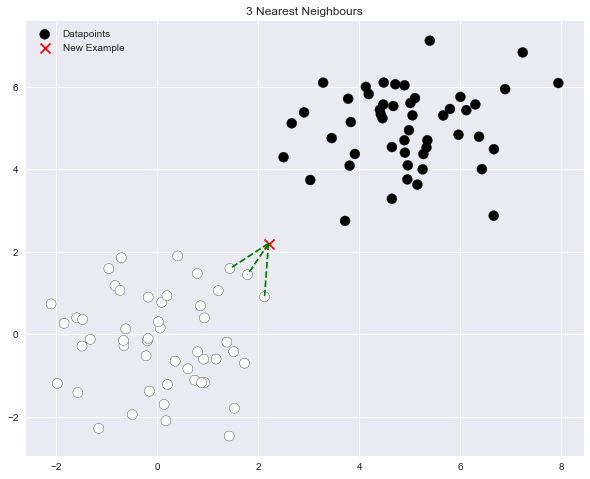

In [8]:
plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', label="Datapoints")
plt.scatter(newExample[0], newExample[1], marker='x', c='red', s =100, label="New Example")

for xi in X[nearest_neighbours_indices]:
    plt.plot([newExample[0], xi[0]], [newExample[1], xi[1]], 'g--')

plt.legend()
plt.title("3 Nearest Neighbours")
plt.show()

Now, we will try and visualize the decision boundary presented by this KNN classifier.

For this we first define a helper function.

In [9]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
    tx = np.linspace(
        np.min(model._X[:,0], axis=0)-2,
        np.max(model._X[:,0], axis=0)+2,
        num_points
    )
    ty = np.linspace(
        np.min(model._X[:,1], axis=0)-2,
        np.max(model._X[:,1], axis=0)+2,
        num_points
    )

    xx,yy = np.meshgrid(tx,ty)
    grid_prediction = np.zeros(xx.shape)

    for i in range(num_points):
        for j in range(num_points):
            grid_prediction[i][j],_ = model.predict([xx[i][j], yy[i][j]])
    
    axis_chart.scatter(xx.ravel(), yy.ravel(), c=grid_prediction.ravel(), alpha=opacity)

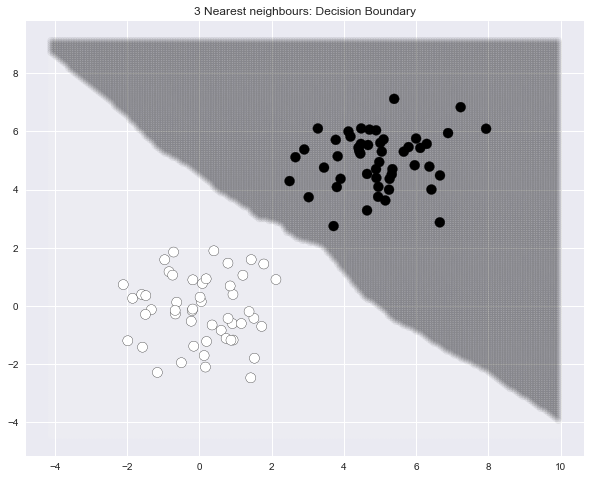

In [12]:
plt.figure(figsize=(10,8))

current_axis = plt.gca()
plt.grid(True)

draw_decision_boundary(model,current_axis)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k')

plt.title("3 Nearest neighbours: Decision Boundary")
plt.show()

### Example 2: Complex Decision Boundary

Following is an example of binary class dataset of two spirals. As it is clear, KNN leads to a very smooth and equidistant decision boundary.

In [17]:
# for creating spiral datasets

def maketwospirals(num_points=1000, rotations=2, noise=0.5):
    '''
    Parameters
    ----------
    num_points : Number of points to be generated per spiral
    rotations : Number of times the spiral must rotate
    noise : noise factor

    Returns
    -------
    Coordinates and class vectors of the two spirals
    '''
    n = np.sqrt(np.random.rand(num_points,1)) * rotations * (2*np.pi)
    rx = - np.cos(n)*n + np.random.rand(num_points,1) * noise
    ry = np.sin(n)*n + np.random.rand(num_points,1) * noise

    return (
        np.concatenate(
            (np.hstack((rx,ry)), np.hstack((-rx,-ry))),
            axis=0
        ),
        np.concatenate(
            (np.zeros(num_points), np.ones(num_points)),
            axis=0
        )
    )

X_spiral, y_spiral = maketwospirals()

In [18]:
print(X_spiral.shape, y_spiral.shape)

(2000, 2) (2000,)


Let's visualize these datapoints.

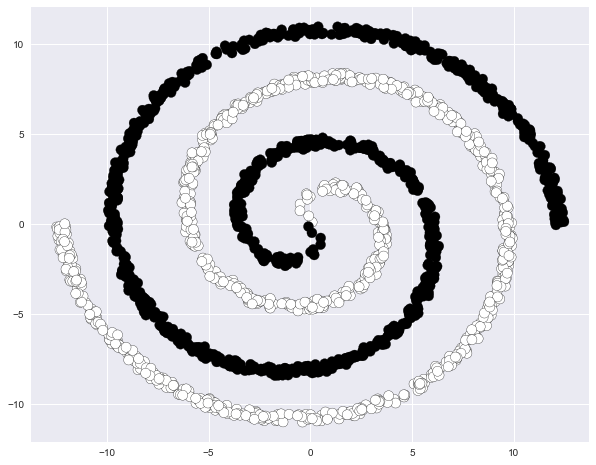

In [19]:
# plot the 2 classes

plt.figure(figsize=(10,8))
plt.scatter(X_spiral[:,0], X_spiral[:,1], marker='o', c=y_spiral, s=100, edgecolor='k')
plt.show()

Let's visualise the decision boundary as traced by the KNN Classifier for the spiral dataset.

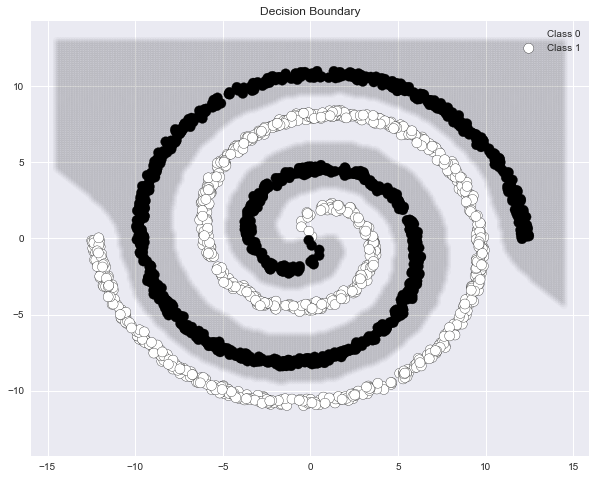

In [20]:
plt.figure(figsize=(10,8))
model = KNN(3)
model.fit(X_spiral, y_spiral)

draw_decision_boundary(model, plt.gca(), opacity=0.02)
plt.scatter(X_spiral[:,0], X_spiral[:,1], marker='o', c=y_spiral, s=100, edgecolor='k')

plt.title("Decision Boundary")

plt.legend(['Class 0', 'Class 1'])
plt.show()

## Regression

In [23]:
# create a dataset of 100 examples with a single feature and a label.
# for this construction, we use the following three parameters:

w0 = 4
w1 = 3
n = 100

X = 2 * np.random.rand(n,)

# obtain y - 4 + 3*x + noise
# noise is randomly sampled

y = w0 + w1 * X + np.random.randn(n,)

In [24]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 1) (80, 1)
(20, 1) (20, 1)


Let's visualize the dataset.

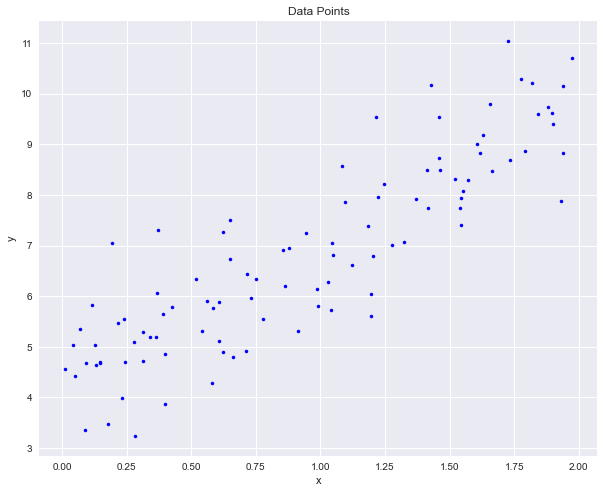

In [27]:
plt.figure(figsize=(10,8))

plt.plot(X,y, 'b.')
plt.title("Data Points")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### Selecting the optimum $k$

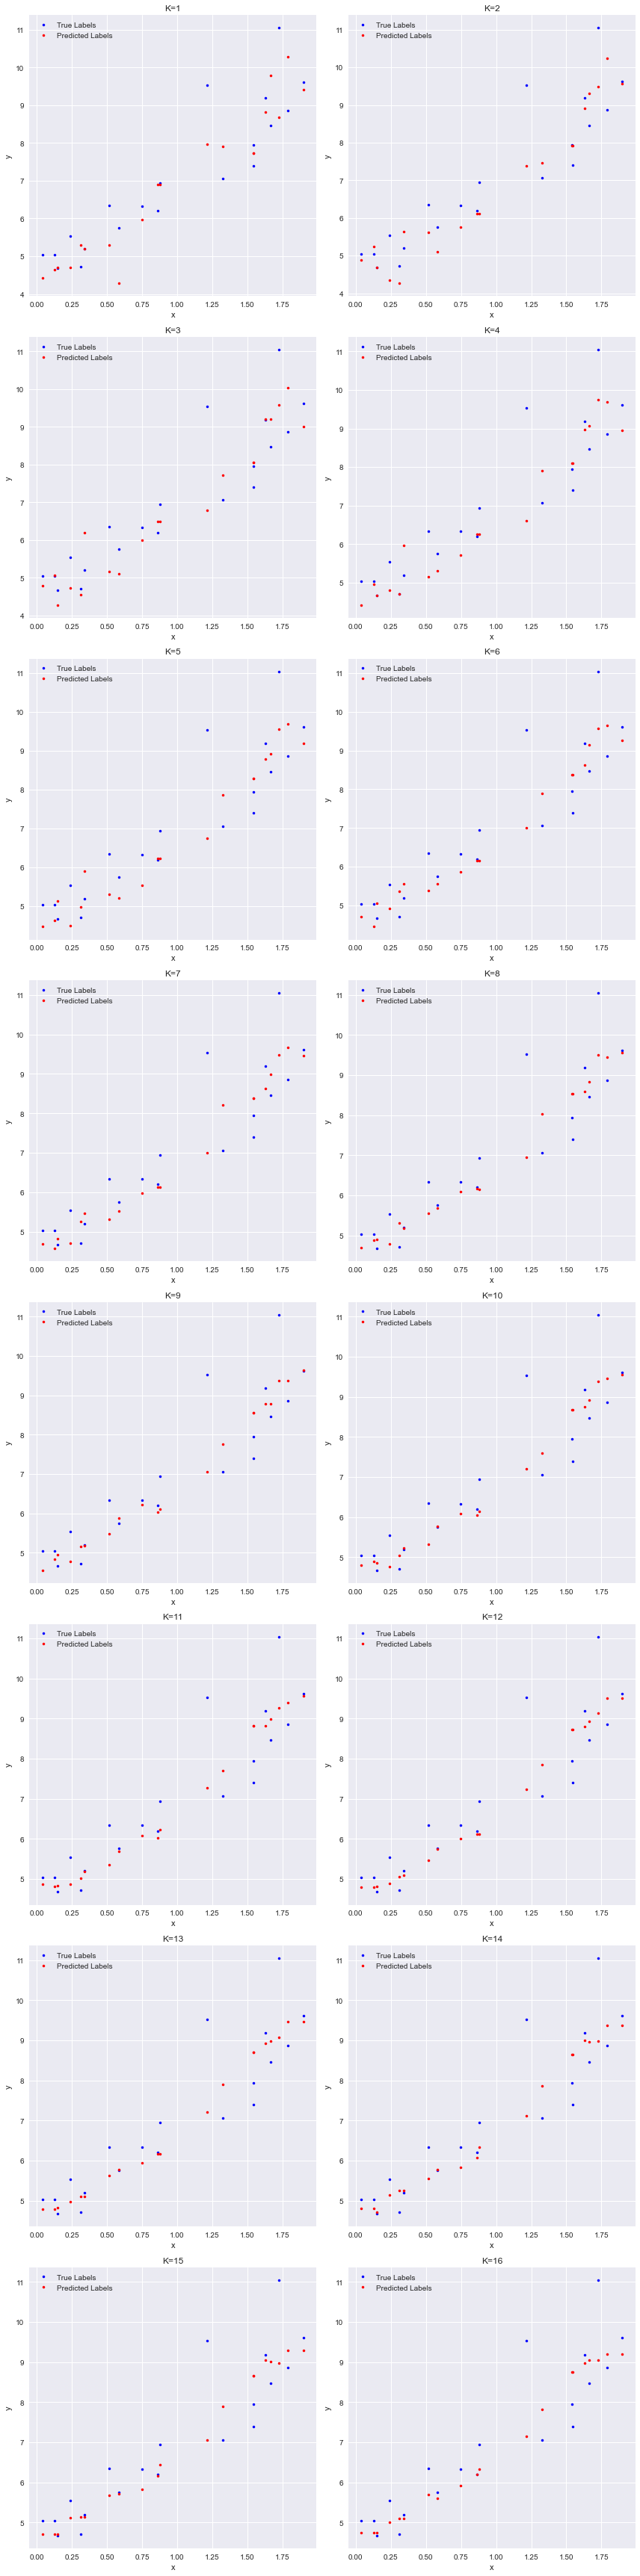

In [29]:
figure, axis = plt.subplots(8,2, figsize=(12,48))
axis = axis.ravel()

error_list = []

# We look at 16 values of k's ranging from k=1 to k = 16 and
# store their corresponding values of errors
for i in range(16):
    # create model with specific value of 'k'
    model = KNN(i+1, task_type="Regression")

    # fit the model with training data
    model.fit(X_train, y_train)

    # create a vector to store the predictions
    y_test_predicted = np.zeros_like(y_test)

    # make prediction on the test set
    for j in range(X_test.shape[0]):
        # predict on the jth sample in the test set
        y_test_predicted[j],_ = model.predict(X_test[j,:])
    
    # store the error (sum squared error) for k=i+1 in the error_list
    error_list.append(np.sum(np.power(y_test-y_test_predicted, 2)))

    # plot the predictions
    axis[i].plot(X_test, y_test, '.b')
    axis[i].plot(X_test, y_test_predicted, '.r')
    axis[i].legend(['True Labels', 'Predicted Labels'])

    # set title
    axis[i].set_title(f"K={i+1}")
    
    axis[i].grid(True)
    axis[i].set(xlabel='x', ylabel='y')

figure.tight_layout()
plt.show()

Let's visualize the sum squared error for each value of $k$.

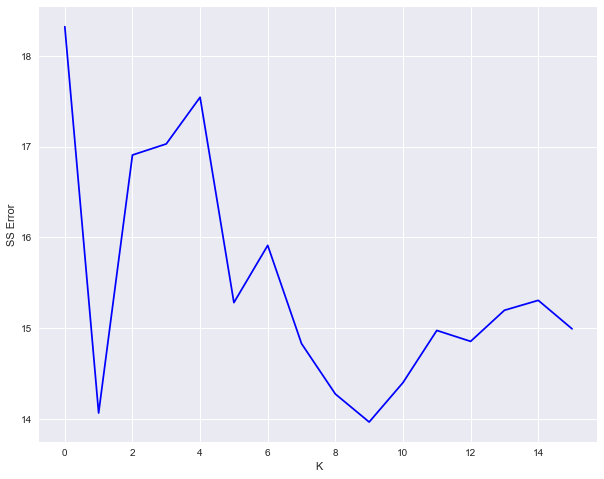

In [31]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(error_list)), error_list, 'b-')
plt.xlabel("K")
plt.ylabel("SS Error")
plt.grid(True)
plt.show()

We can see that the error seems to be low for $k = 3$ and $k = 9$.

Here, we can expect to obtain a relatively overfitted model for $k = 3$, and a relatively underfitted model for $k = 9$. So, we need to choose based on the context and requirement.